In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py
from scipy import stats
import seaborn as sns
import cufflinks as cf
from ipywidgets import interact
import plotly.tools as tls
cf.go_offline()

In [2]:
df=pd.read_csv('../train.csv')
df.shape

(1460, 81)

In [3]:
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


# PART 1: Explore data and understand what the fields mean. Descriptive statistics 

## Part 1.1 There are 6965  rows with Nan value. Cleaning

Dropped all the columns, where the exist ANY NaN value:
'Alley','MasVnrType','MasVnrArea', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1','Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond', 'PoolQC','Fence', 'MiscFeature'.

Total 19 dropped in the dataframe : 62 remained out of 81 columns.
Normally, I had to "Remove columns with high proportion of missing values." But due to reduced time, I don't dare to explore those columns yet. Maybe sometimes later. There are still 62 columns to explore and to use.

I also, played with df.dropna(thresh=2), thresh was set from 80 to 70, then decreasing to 70. Row number of 1460 remained unchanged - maybe a bug

In [4]:
df=df.dropna(axis=1, how='any')

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [6]:
df.isnull().sum().sum()# Check that now the table contains 0 NaN value

0

## Part 1.2 - Explore "SalePrice" Column

In [7]:
df.SalePrice.describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

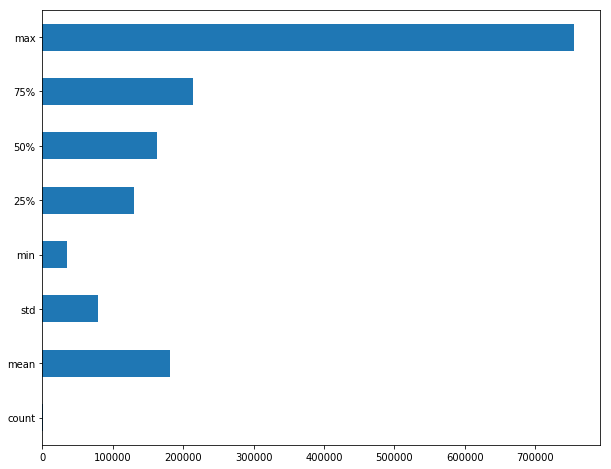

In [8]:
df.SalePrice.describe().plot.barh(figsize=(10,8))

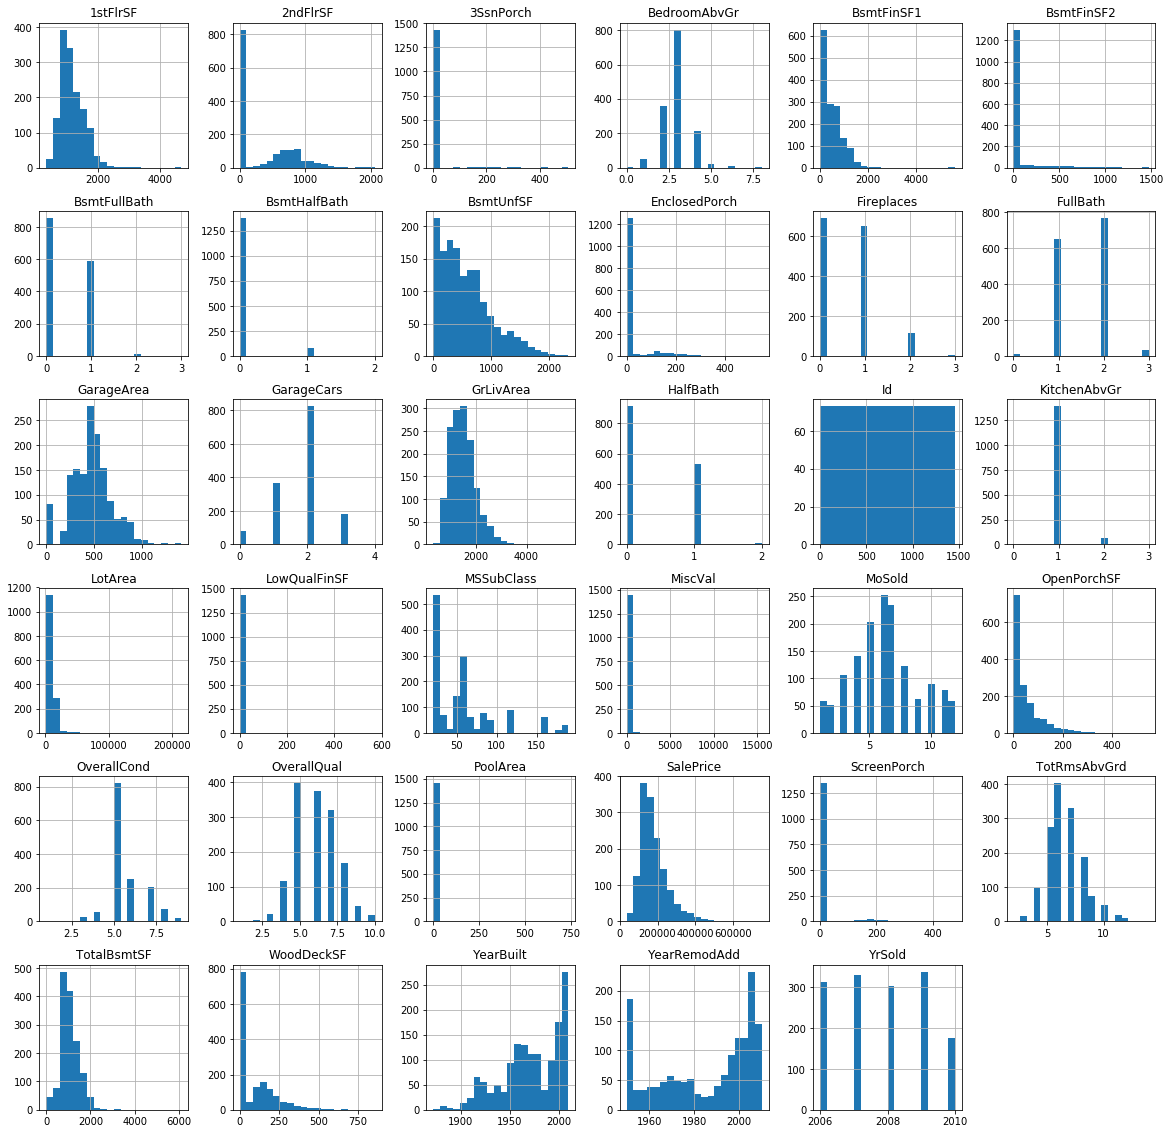

In [9]:
df.hist(bins=20, figsize=(20,20))
plt.show()
# Part 1.3 Have a visual support to understand other columns for my further exploratory analysis

## Part 1. 4 - Visual representation of 'Building Type' column. 

In [10]:
df.BldgType.value_counts()
# Part 1. 4 - Visual representation of Building Type column. Out of 1460 rows there are:

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [11]:
sizes=df.BldgType.value_counts()
labels = ['Single-family Detached', 'Townhouse End Unit', 'Duplex', 'Townhouse Inside Unit', 'Two-family Conversion']

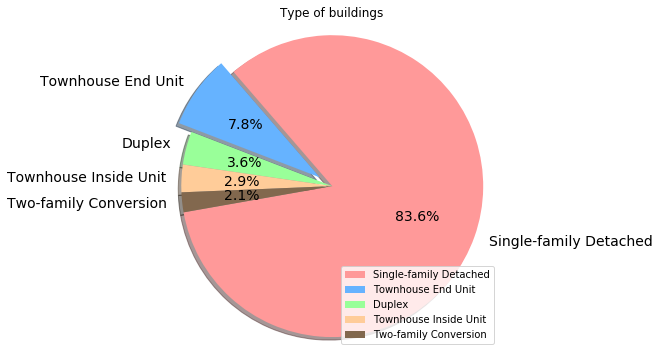

In [12]:
explode = (0, 0.1, 0,0,0)
fig1, ax1 = plt.subplots(figsize=[6, 6])
plt.title('Type of buildings')
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#82684E']
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=190, colors=colors, explode=explode, textprops={'fontsize': 14})
ax1.axis('equal')

plt.legend(labels,loc=4)
plt.show()

## Part 1.4 - Conclusion
## 83.6 % of Data concerns "Single-Family Detached" type of buildings. 
## Well, lets reduce the scope and explore further the data which is > 80% of entire Dataset

In [13]:
df=df[df['BldgType']=='1Fam']
df.shape
# There 1220 rows (83.6 %) Single Family Detached buildings sold.
# the dataframe now contains only this type of buildings.

(1220, 62)

'''
Checking the SalePrice in the original dataframe before filtering to 1 type of buildings. 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
  
  
  to the dataframe with single family buildings only :
count    1220.000000  
mean     185763.807377
std      82648.502922 
min      34900.000000 
25%      131475.000000
50%      167900.000000
75%      222000.000000
max      755000.000000
Name: SalePrice, dtype: float64

mean Before= 180921.19 vs After Filtering = 185763.80. Delta is 4842.61. Which is 2.7 % increase of the mean value,
while 16.4 % of data dropped off.

'''

## Part 1.5 - MSZoning column exploration. How the price of the Sales depends on the classification of the zone

MSZoning: Identifies the general zoning classification of the sale.
       C	Commercial.
       FV	Floating Village Residential. 
       RH	Residential High Density.
       RL	Residential Low Density.
       RM	Residential Medium Density.

In [14]:
ZonesTable=df.groupby('MSZoning', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean).sort_values(by='Average')

In [15]:
ZonesTable

,Minimum,Maximum,Average
MSZoning,,,
C (all),34900,108000,67931.111111
RH,76000,159434,110770.444444
RM,37900,475000,125436.899281
RL,39300,755000,193592.266341
FV,176000,370878,240940.236842


In [16]:
ZonesTable.iplot(kind='bar', xTitle='Zoning Classification', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by Zone Classification', filename='bar-direct-labels')

The highest minimum and average is noticed in FV Floating Village Residential, as well as in the "
RL Residential Low Density".  SalePrice in C Commercial classified zones are lowest.

## Part 1.6 - Neighborhood

In [17]:
df.groupby('Neighborhood')['MSZoning'].value_counts()

Neighborhood  MSZoning
Blmngtn       RL            1
BrkSide       RM           30
              RL           26
ClearCr       RL           28
CollgCr       RL          140
Crawfor       RL           45
Edwards       RL           78
              RH            2
              RM            1
Gilbert       RL           78
IDOTRR        RM           25
              C (all)       9
Mitchel       RL           36
NAmes         RL          205
NWAmes        RL           71
NoRidge       RL           41
NridgHt       RL           55
OldTown       RM           83
              RL           13
SWISU         RL           19
              RH            3
Sawyer        RL           67
SawyerW       RL           43
              RH            4
Somerst       FV           38
              RL           21
StoneBr       RL           13
Timber        RL           37
Veenker       RL            8
Name: MSZoning, dtype: int64

In [18]:
NeighbTable=df.groupby('Neighborhood', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean).sort_values(by='Average')

In [19]:
NeighbTable.iplot(kind='bar', xTitle='Neighborhood Impact', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by Neighborhood', filename='bar-direct-labels')

Chic neighborhood noticed to be Somerst=Somerset with FV=38 and RL=21 dwellings sold at higher average prices.
StoneBr = Stone Brook is classified as RL zone with only 13 dwellings sold, but with the highest average price.
NridgHt =Northridge Heights= RL with 55 is Number 2.

## Part 1.7 - Overall Condition

There majority of sells are in conditions 5 - Average and 6 - Above Average.
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Text(0, 0.5, 'Count')

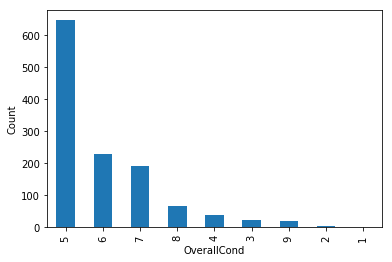

In [20]:
df['OverallCond'].value_counts().plot(kind='bar')
plt.xlabel('OverallCond')
plt.ylabel('Count')

In [21]:
OverallCondition=df.groupby('OverallCond', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean)

In [22]:
OverallCondition.iplot(kind='bar', xTitle='OverallCondition Impact', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by OverallCondition', filename='bar-direct-labels')

#### Strangely the dwellings rated at 5 and 6 position - have the Maximum higher than 7-9?


## Part 1.8 - Year of transaction and Prices

In [23]:
YrSold=df.groupby('YrSold', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean)

In [24]:
YrSold.iplot(kind='bar', xTitle='YrSold', yTitle='SalePrice')

## Part 1.9 - Lot size and the price correspondingly

### Vizualized the most common lot size and the prices
##### LotArea: Lot size in square feet. 

In [25]:
df_tronque=df[(df.SalePrice < df.SalePrice.quantile(0.90)) & (df.SalePrice > df.SalePrice.quantile(0.10))& (df.LotArea < df.LotArea.quantile(0.8) )]
df_tronque.SalePrice.describe()

count       796.000000
mean     169711.443467
std       43668.483094
min      108480.000000
25%      134875.000000
50%      160500.000000
75%      195000.000000
max      287000.000000
Name: SalePrice, dtype: float64

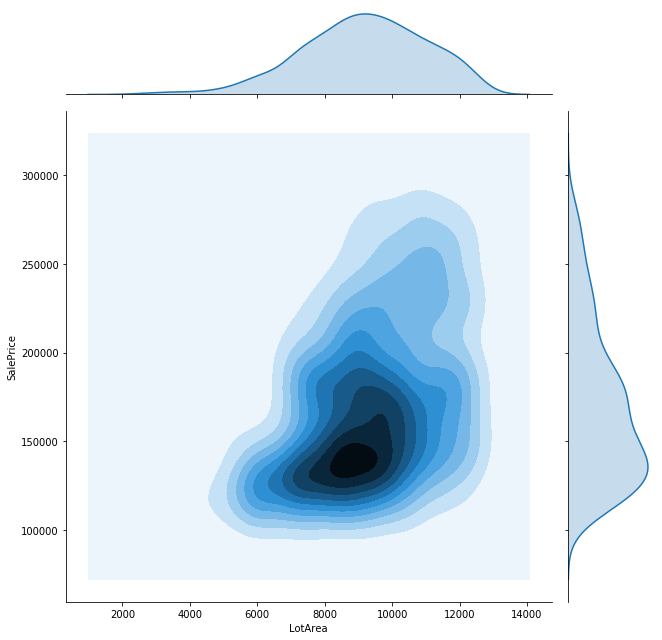

In [26]:
sns.jointplot(x='LotArea', y='SalePrice', data=df_tronque, kind="kde", height=9)

In [27]:
df_tronque.SalePrice.describe()

count       796.000000
mean     169711.443467
std       43668.483094
min      108480.000000
25%      134875.000000
50%      160500.000000
75%      195000.000000
max      287000.000000
Name: SalePrice, dtype: float64

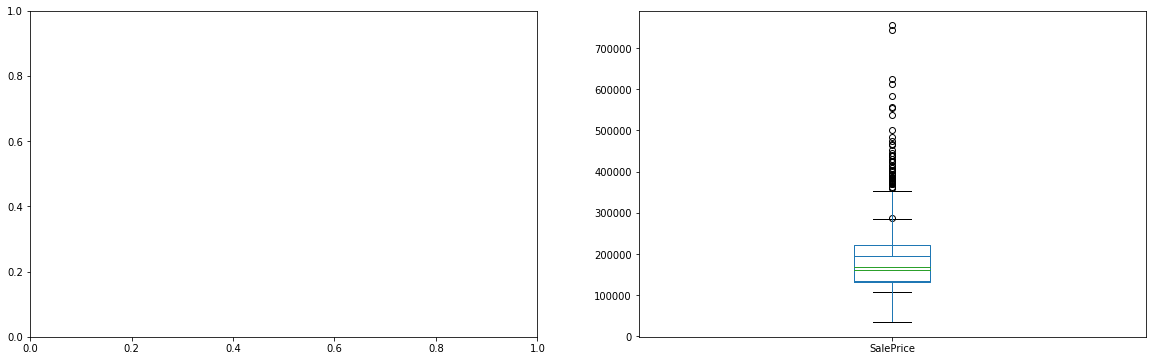

In [29]:
fig, (ax1, ax2)=plt.subplots(1,2, figsize=(20,6))

ax1=df_tronque.SalePrice.plot.box()

ax2=df.SalePrice.plot.box()

##### Most commonly sold sizes are between 7000 and 11000 square feet with the prices in 100k to 200k.

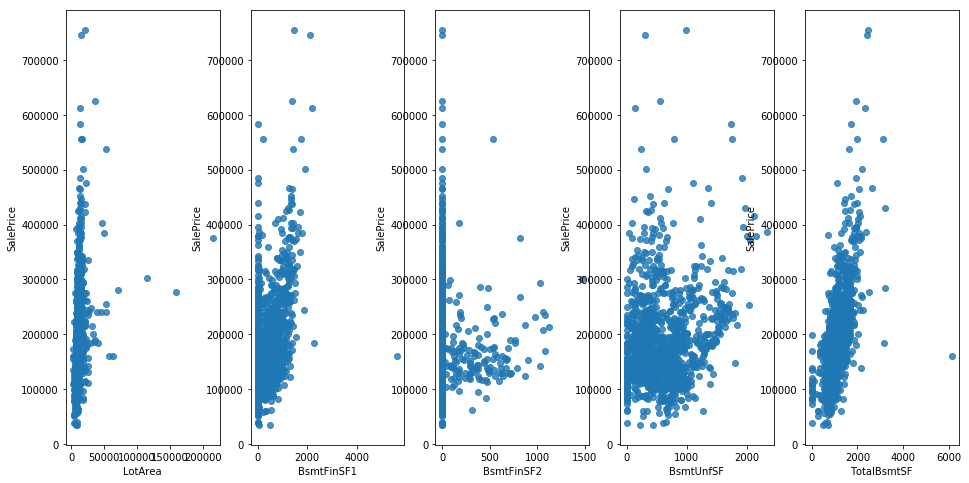

In [43]:
cols=['LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']
to=df[cols]
fig,axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 5)
for i in range(5):
    plt.sca(axes[i])
    plt.scatter(to.iloc[:,i],to['SalePrice'], alpha = 0.8)
    plt.xlabel(to.iloc[:,i].name)
    plt.ylabel('SalePrice')

In [29]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

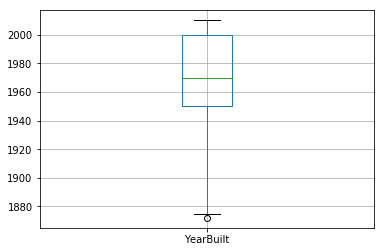

In [48]:
df.boxplot(column='YearBuilt')

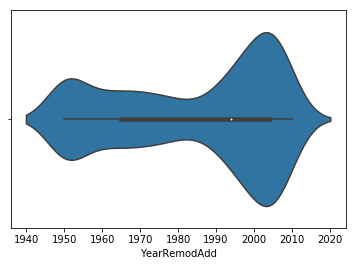

In [58]:
sns.violinplot('YearRemodAdd', data=df)

In [30]:
df.OverallCond.unique()

array([5, 8, 6, 7, 4, 2, 3, 9, 1], dtype=int64)

In [72]:
df.SalePrice.quantile(0.8)

237100.00000000003

In [68]:
df.LotArea.describe()

count      1220.000000
mean      11240.634426
std        9578.994040
min        2500.000000
25%        8359.250000
50%        9819.000000
75%       12000.000000
max      215245.000000
Name: LotArea, dtype: float64

In [57]:
df.YearBuilt.sort_values(ascending=False)

378     2010
460     2009
898     2009
987     2009
762     2009
        ... 
304     1880
747     1880
1132    1880
1137    1875
1349    1872
Name: YearBuilt, Length: 1220, dtype: int64

In [31]:
df.MSSubClass.unique()

array([ 60,  20,  70,  50,  45,  30,  85,  80,  75,  40, 120], dtype=int64)

In [32]:
# df.plot(df['OverallCond'], df['SalePrice'])

In [33]:
df.Condition1.unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRAn', 'PosA', 'RRNe',
       'RRNn'], dtype=object)

In [34]:
df.select_dtypes(include=['float64', 'int64']).head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500


In [35]:
plt.figure(figsize=(20, 10), dpi=200)
# plt.hist( x, df['SalePrice'])

<Figure size 4000x2000 with 0 Axes>

<Figure size 4000x2000 with 0 Axes>

In [46]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

In [42]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

In [36]:

'''
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
       '''

'\nMSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n       '

Text(0, 0.5, 'Count')

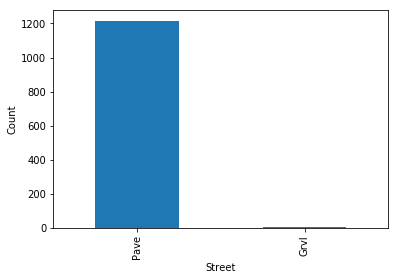

In [47]:
df['Street'].value_counts().plot(kind='bar')
plt.xlabel('Street')
plt.ylabel('Count')